In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split

%matplotlib inline 
sns.set()

# 1 EDA

In [29]:
test_df = pd.read_csv("./dataset/28_2_titanic_test.csv")
train_df = pd.read_csv("./dataset/28_2_titanic_train.csv")
print(train_df.shape)
train_df.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


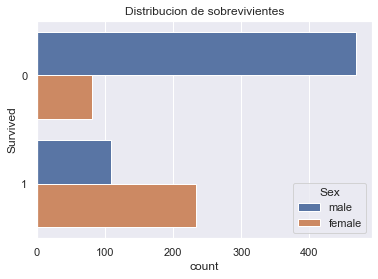

In [12]:
sns.countplot(data= train_df, y="Survived", hue= "Sex", )
plt.title('Distribucion de sobrevivientes')
plt.show()

# 2 preprocesamos data 

## 2.1 tratamos nulos

In [30]:
pd.DataFrame(train_df.isnull().any()).T# aplique la transpuesta para que el rsultado fuera en columnas

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,True,False,False,False,False,True,True


llenamos con la mediana pór que es una de las medidas de tendencia central que menos se afecta por los datos atípicos.

Para el caso de los datos categóricos relacionados con el embarque, se utiliza la letra S porque representa el embarque en la ciudad de South Hampton, en donde más personas se unieron al viaje.

In [60]:
# lleanmos las columnas de nulls con: 
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median()) # la mediana
train_df['Embarked'] = train_df['Embarked'].fillna('S') # la media 

## 2.2 seleaccion de caracteristicas 

In [61]:
# eliminamos columnas (axis=1) que no son utiles
train_predictors = train_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)

"""# identificamos que columnas son categoricas y numericas, esto no tienen ninguna utilidad en este momento 
categorical_cols = [cname for cname in train_predictors.columns if
                        train_predictors[cname].nunique() < 10 and # esto quiere decir que las categorias sean menor a 10 
                        train_predictors[cname].dtype == 'object'
                        ]
numerical_cols = [cname for cname in train_predictors.columns if
                train_predictors[cname].dtype in ['int64', 'float64']
                ]
print(categorical_cols, numerical_cols)

my_cols = categorical_cols + numerical_cols
train_predictors = train_predictors[my_cols]
"""
train_predictors.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


en vez de usar pd.get_dummies se pudo haber usado 
```python
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

encoder_sex = label_encoder.fit_transform(train_df['Sex'])
encoder_sex
```

In [62]:
dummy_encoded_train_predictors = pd.get_dummies(train_predictors)
dummy_encoded_train_predictors.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


## definimos X, y

In [70]:
X = dummy_encoded_train_predictors.drop(['Survived'], axis = 1)# .values
y = dummy_encoded_train_predictors['Survived'] # .values


In [71]:
x_train, x_validation, y_train, y_validation = train_test_split(X, y, test_size = .25, random_state = 1)

In [72]:
tree_one = tree.DecisionTreeClassifier()
tree_one = tree_one.fit(x_train, y_train)

In [73]:
tree_one_accuracy = round(tree_one.score(x_validation, y_validation), 4)
print('Accuracy: %0.4f' % (tree_one_accuracy))

Accuracy: 0.7489


crear una imagen con el arbol de decision 
abajo coloque el codigo para graficar solo que tengo el problema con las variables de netorno asi que lo dejare hasta aqui, 

In [ ]:
from io import StringIO 
from IPython.display import Image, display
import pydotplus


out = StringIO()
tree.export_graphviz(tree_one, out_file = out)

graph = pydotplus.graph_from_dot_data(out.getvalue())
graph.write_png('titanic.png')


In [ ]:
from IPython.display import Image  
# Create DOT data
dot_data = tree.export_graphviz(tree_one, out_file=None, 
                                feature_names= list(X.columns),  
                                class_names= ["1", "0"])

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())


# k means

In [ ]:
from sklearn.cluster import KMeans
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt

iris = datasets.load_iris() 
X_iris = iris.data
Y_iris = iris.target

In [ ]:
x = pd.DataFrame(iris.data, columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
y = pd.DataFrame(iris.target, columns = ['Target'])
x.head(5)

In [ ]:
plt.scatter(x['Petal Length'], x['Petal Width'], c = 'blue')
plt.xlabel('Petal Length', fontsize = 10)
plt.ylabel('Petal Width', fontsize = 10)

In [ ]:
model = KMeans(n_clusters = 3, max_iter = 1000)
model.fit(x)
y_labels = model.labels_
y_kmeans = model.predict(x)
print('Predicciones ', y_kmeans)

In [ ]:
from sklearn import metrics

accuracy = metrics.adjusted_rand_score(Y_iris, y_kmeans)
print(accuracy)

plt.scatter(x['Petal Length'], x['Petal Width'], c= y_kmeans, s = 30)
plt.xlabel('Petal Length', fontsize = 10)
plt.ylabel('Petal Width', fontsize = 10)